Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

Chargement et exploration des données

In [2]:
df = pd.read_csv("cancer-risk-factors.csv")

In [3]:
df.columns

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'Overall_Risk_Score', 'BMI',
       'Physical_Activity_Level', 'Risk_Level'],
      dtype='object')

In [4]:
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [5]:
df.tail()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
1995,ST0395,Colon,60,1,4,6,4,0,10,6,...,4,5,3,1,0,4,0.437539,30.3,3,Medium
1996,ST0396,Prostate,84,1,5,7,8,0,10,0,...,2,1,3,0,0,2,0.451128,25.9,4,Medium
1997,ST0397,Lung,65,0,7,2,10,0,4,2,...,3,6,0,0,1,0,0.295760,22.5,3,Low
1998,ST0398,Lung,64,1,10,2,10,0,2,10,...,5,4,2,0,0,10,0.422201,25.3,3,Medium
1999,ST0399,Breast,64,0,3,4,10,0,0,5,...,0,3,9,0,0,0,0.518137,23.0,3,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [7]:
df.describe()

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


Partie 1: Prétraitement des données

1-Gestion des doublons

In [8]:
# 1- Detection des doublons
doublons_avant = df.duplicated().sum()
print("Nombre de doublons:", doublons_avant)

Nombre de doublons: 0


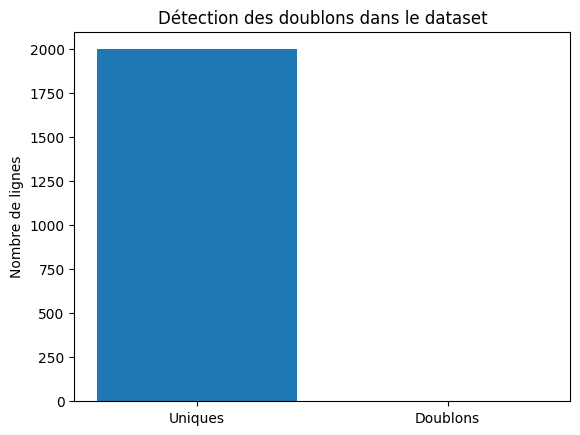

In [9]:
# Nombre de doublons
doublons_avant = df.duplicated().sum()
uniques = len(df) - doublons_avant
# Données
labels = ['Uniques', 'Doublons']
values = [uniques, doublons_avant]

# Tracé
plt.bar(labels, values)
plt.title('Détection des doublons dans le dataset')
plt.ylabel('Nombre de lignes')
plt.show()

2-Gestion des valeurs manquantes

In [10]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
Overall_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Risk_Level                 0
dtype: int64


C:\Users\ikbel\AppData\Local\Temp\ipykernel_40632\3225642505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


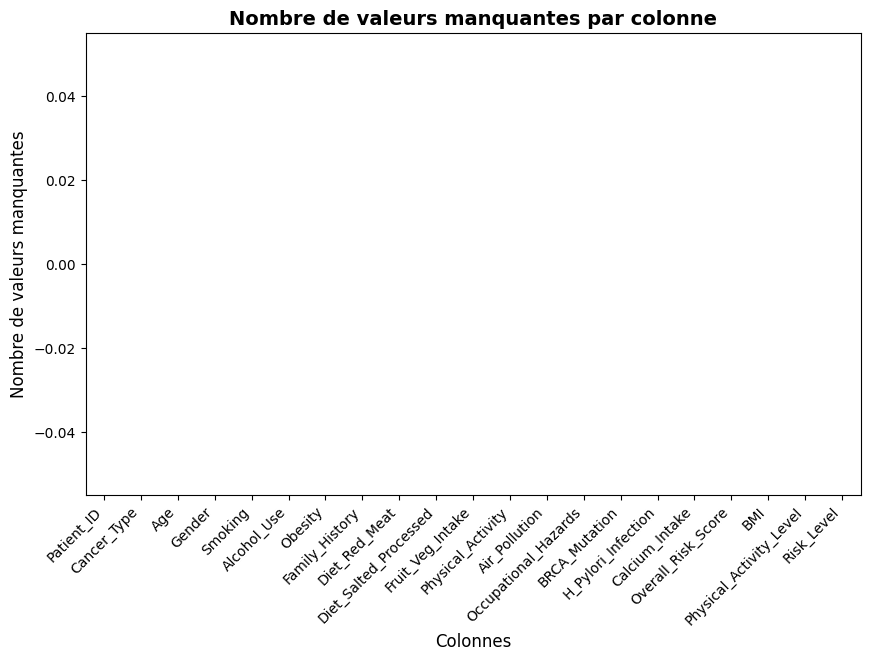

In [11]:
# Comptage des valeurs manquantes
missing_values = df.isnull().sum()

# Préparation du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

plt.title("Nombre de valeurs manquantes par colonne",
          fontsize=14, fontweight="bold")
plt.ylabel("Nombre de valeurs manquantes", fontsize=12)
plt.xlabel("Colonnes", fontsize=12)
plt.xticks(rotation=45, ha='right')  # rotation des labels pour lisibilité
plt.show()

3-Gestion des valeurs abberrantes

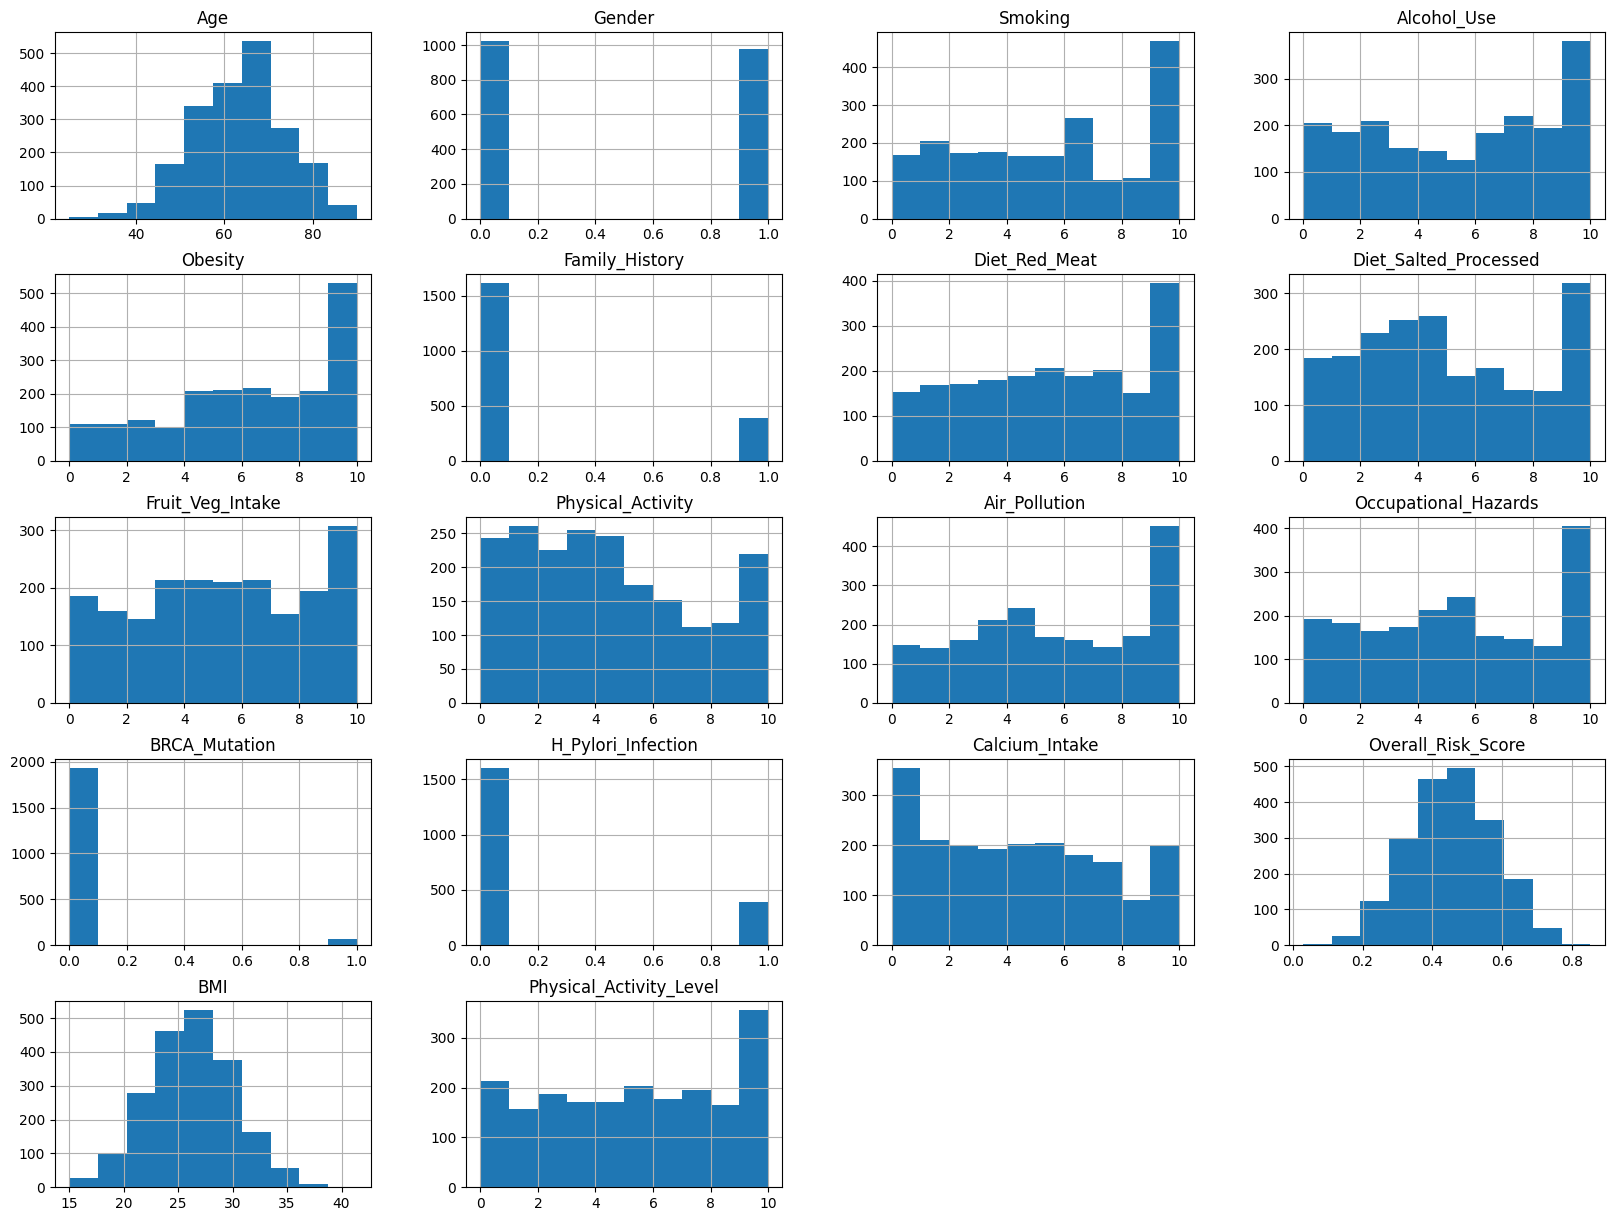

In [12]:
# Displying Histograms
df.hist(figsize=(20, 15))
plt.show()

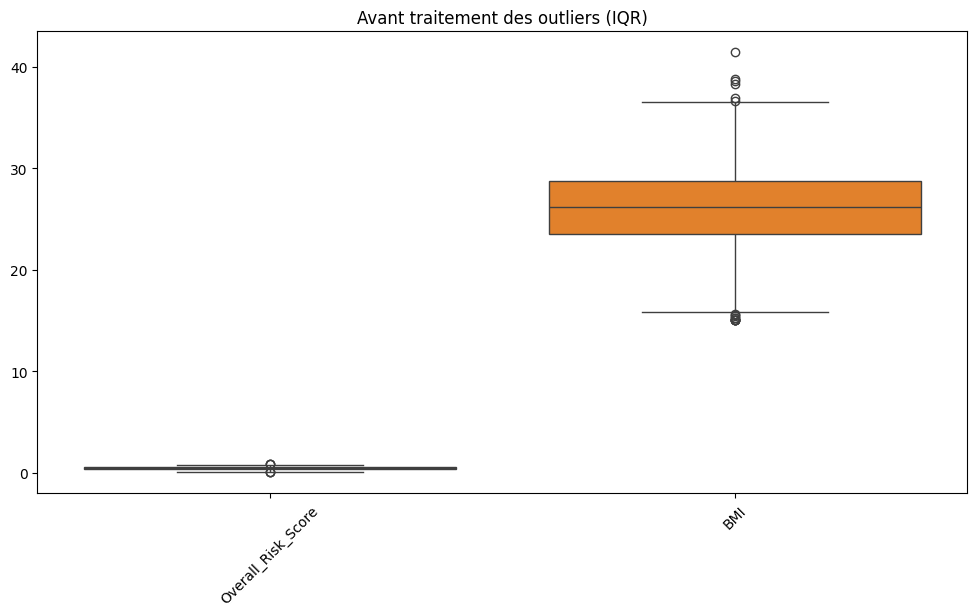

In [13]:
# 1. Données originales
# =========================
num_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Avant traitement des outliers (IQR)")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Traitement des valeurs abberrantes
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping (remplacement des valeurs extrêmes)
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

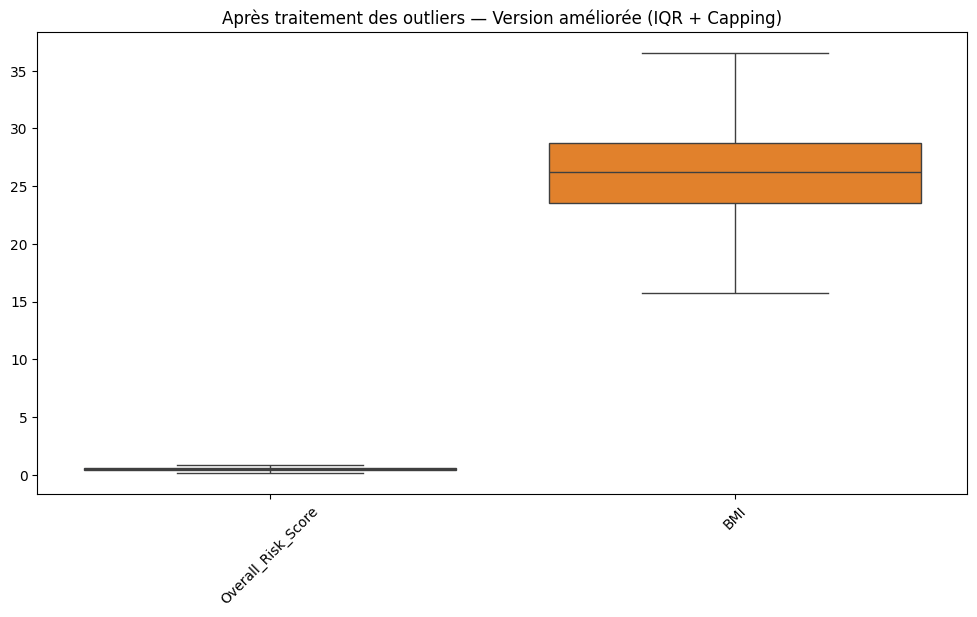

In [15]:
# 3. Données nettoyées
# =========================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[num_cols])
plt.title("Après traitement des outliers — Version améliorée (IQR + Capping)")
plt.xticks(rotation=45)
plt.show()


Partie 2: Transformation de données

In [16]:
df['Lifestyle_Score'] = df['Smoking'] + df['Alcohol_Use'] + df['Obesity']
df['Diet_Score'] = df['Diet_Red_Meat'] + df['Diet_Salted_Processed'] - df['Fruit_Veg_Intake']
df['Activity_Score'] = 10 - df['Physical_Activity']
df['Genetic_Score'] = df['Family_History'] + df['BRCA_Mutation']

df['Smoke_Pollution'] = df['Smoking'] * df['Air_Pollution']
df['Obesity_Age'] = df['Obesity'] * df['Age']
df['Alcohol_Liver'] = df['Alcohol_Use'] * (df['BMI'] / 5)

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 39, 59, 120], labels=['<40', '40-59', '60+'])
df['BMI_Class'] = pd.cut(df['BMI'], bins=[0, 24.9, 29.9, 100], labels=['Normal', 'Overweight', 'Obese'])


In [17]:
features_for_pca = [
    'Lifestyle_Score',
    'Diet_Score',
    'Activity_Score',
    'Genetic_Score',
    'Smoke_Pollution',
    'Obesity_Age',
    'Alcohol_Liver',
    'Age',
    'BMI'
]


In [18]:
from sklearn.preprocessing import StandardScaler

X = df[features_for_pca]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=3, random_state=0)
pca_components = pca.fit_transform(X_scaled)

# Ajouter les composantes au dataframe
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]
df['PC3'] = pca_components[:, 2]

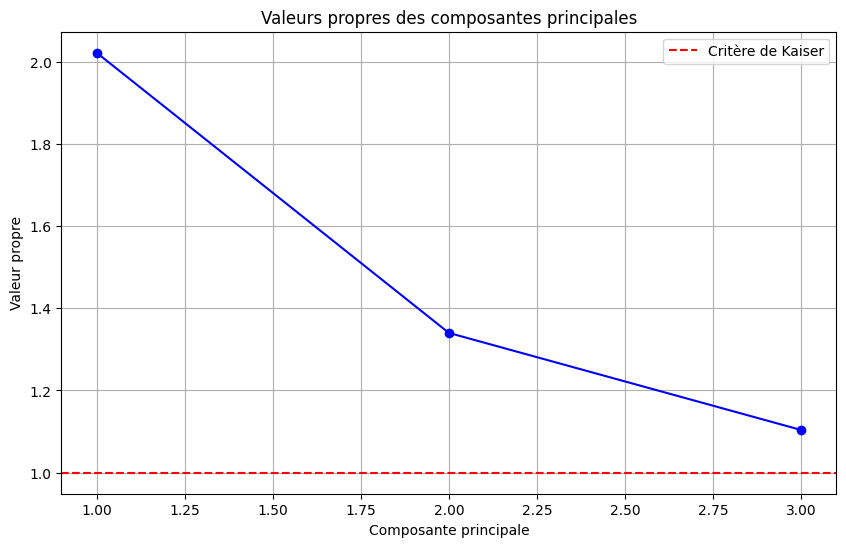

  Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1       2.021453                 22.45                  22.45
1      Dim2       1.340006                 14.88                  37.33
2      Dim3       1.103889                 12.26                  49.59


In [20]:
# Valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10,6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', color='b')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')
plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend()
plt.grid(True)
plt.show()

# Variance expliquée détaillée
eig = pd.DataFrame({
    "Dimension": ["Dim" + str(i+1) for i in range(len(pca.explained_variance_))],
    "Valeur propre": eigenvalues,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})
print(eig)


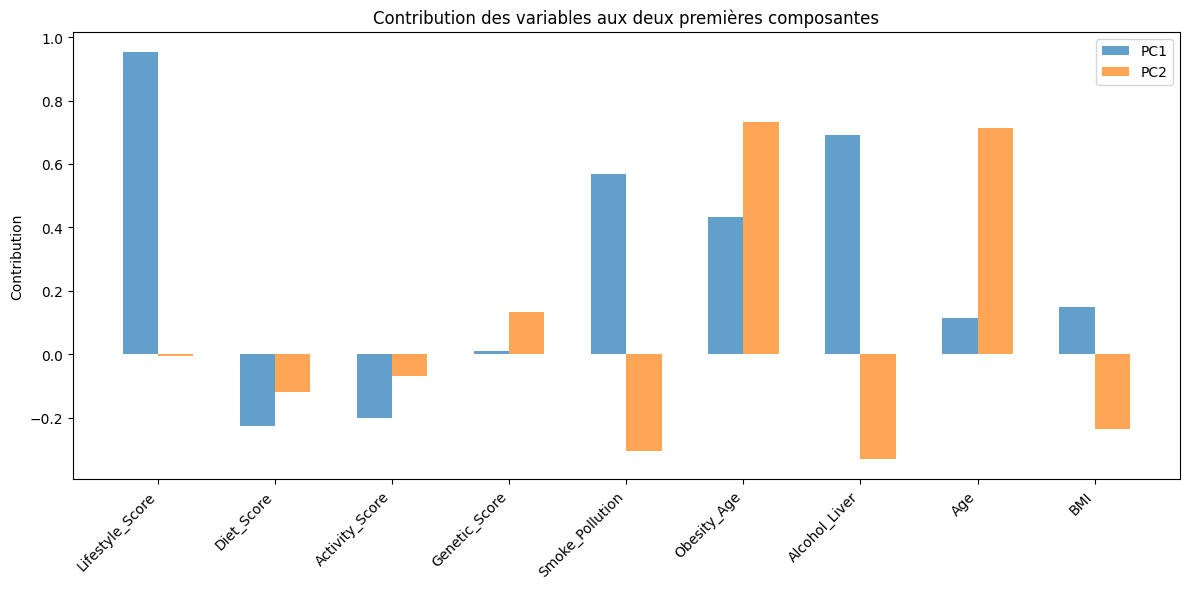

In [21]:
# Contribution des variables (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12,6))
x = np.arange(len(features_for_pca))
plt.bar(x - 0.15, loadings[:,0], width=0.3, alpha=0.7, label='PC1')
plt.bar(x + 0.15, loadings[:,1], width=0.3, alpha=0.7, label='PC2')
plt.xticks(x, features_for_pca, rotation=45, ha='right')
plt.ylabel("Contribution")
plt.title("Contribution des variables aux deux premières composantes")
plt.legend()
plt.tight_layout()
plt.show()


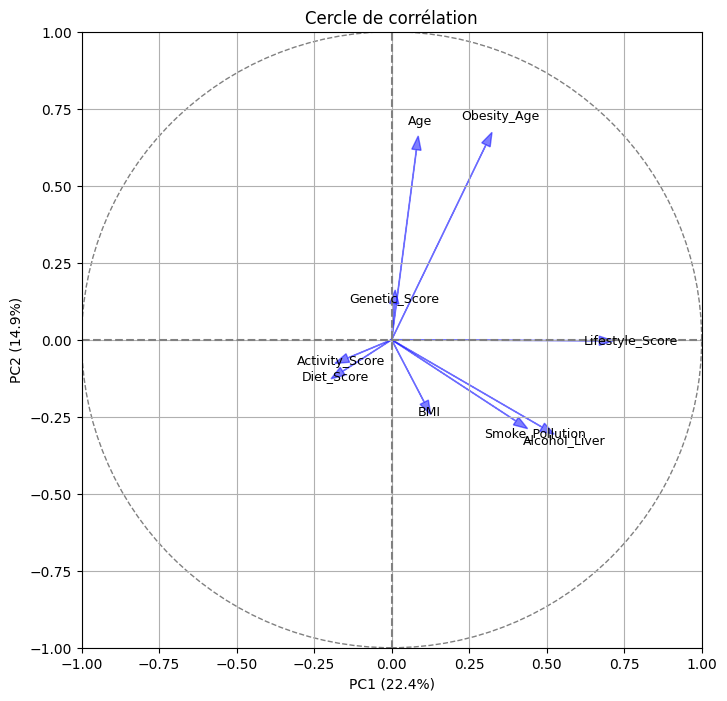

In [22]:
plt.figure(figsize=(8,8))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()

for i, feature in enumerate(features_for_pca):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], 
              color='blue', alpha=0.5, head_width=0.03)
    plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, feature, 
             color='black', ha='center', va='center', fontsize=9)

circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlabel("PC1 ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.title("Cercle de corrélation")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()


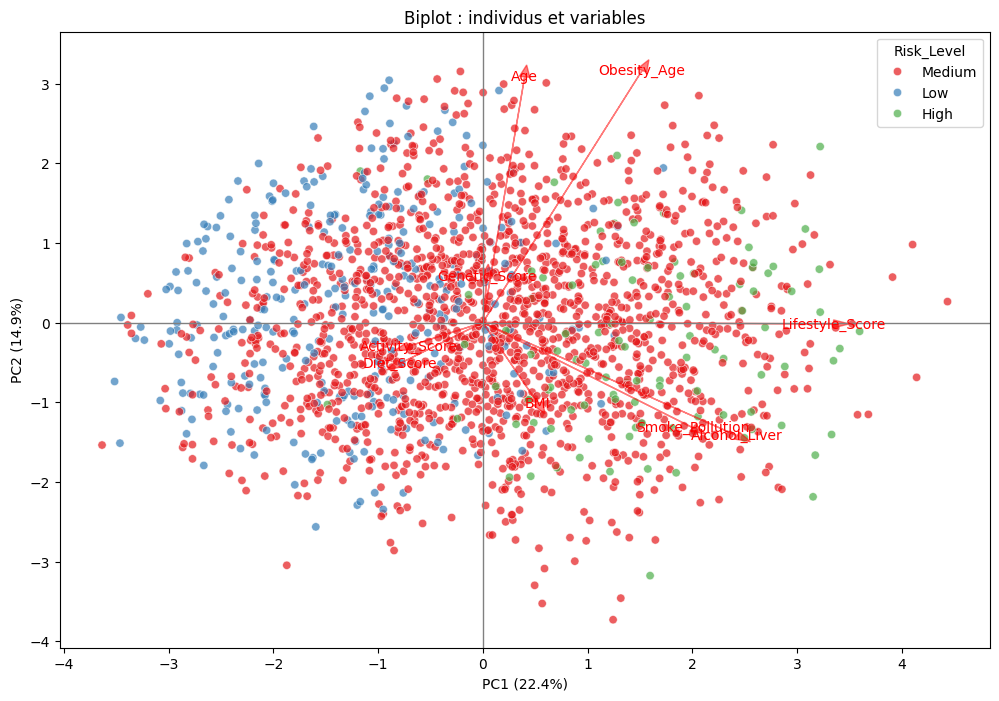

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='Risk_Level', palette='Set1', alpha=0.7)

# Ajout des flèches pour les variables
for i, feature in enumerate(features_for_pca):
    plt.arrow(0,0, pca.components_[0,i]*5, pca.components_[1,i]*5, color='red', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0,i]*5, pca.components_[1,i]*5, feature, color='red', ha='center', va='center')

plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)
plt.xlabel("PC1 ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.title("Biplot : individus et variables")
plt.show()


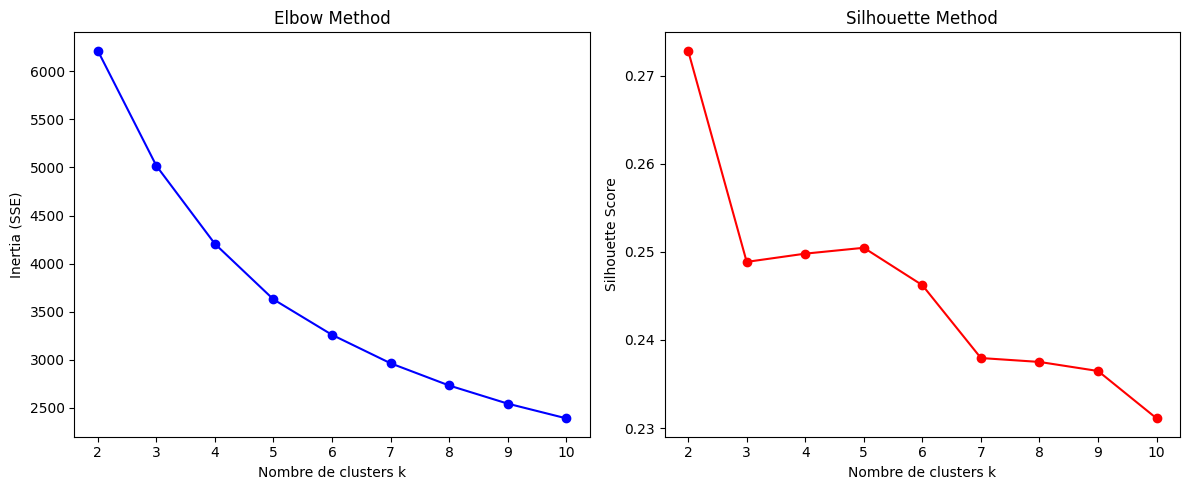

Profil moyen par cluster :
          Lifestyle_Score  Diet_Score  Activity_Score  Genetic_Score  \
Cluster                                                               
0              21.087622    3.656467        5.382476       0.175243   
1              10.859911    6.424739        6.621461       0.193741   
2              16.180328    4.444262        5.995082       0.324590   

         Smoke_Pollution  Obesity_Age  Alcohol_Liver        Age        BMI  
Cluster                                                                     
0              57.161335   375.582754      38.895160  60.987483  26.857441  
1              18.718331   222.317437      16.807928  59.019374  25.630999  
2              17.975410   548.893443      22.013410  70.563934  25.996393  
✅ Clustering et recommandations terminés. Résultats sauvegardés.


In [24]:
# ===============================
# 0️⃣ Imports nécessaires
# ===============================
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import warnings

# Ignorer certains warnings de KMeans sur Windows
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# ===============================
# 5️⃣ Clustering
# ===============================
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_components)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(pca_components, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.tight_layout()
plt.show()

# Choix de k = 3 (exemple)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(pca_components)

# Profil moyen par cluster
cluster_profiles = df.groupby('Cluster')[features_for_pca].mean()
print("Profil moyen par cluster :\n", cluster_profiles)

# ===============================
# 6️⃣ Recommandations automatiques
# ===============================
def generate_recommendations(row):
    recs = []
    if row['Smoking'] >= 7 or row['Lifestyle_Score'] >= 35:
        recs.append("Arrêt du tabac: programme + suivi médical")
    if row['Diet_Score'] >= 10:
        recs.append("Conseil nutritionnel: réduire viande transformée et sel, augmenter fruits/légumes")
    if row['Activity_Score'] >= 12:
        recs.append("Augmenter activité physique: 150 min/semaine progressif")
    if row['Smoke_Pollution'] >= 12:
        recs.append("Réduire exposition pollution: filtres, protections équipements pro")
    if row['Genetic_Score'] >= 2:
        recs.append("Orientation oncogénétique & dépistage renforcé")
    return "; ".join(recs) if recs else "Maintenir habitudes + dépistage standard"

df['Recommendations'] = df.apply(generate_recommendations, axis=1)

# ===============================
# 7️⃣ Sauvegarde des artefacts
# ===============================
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

# ===============================
# 8️⃣ Export résultats
# ===============================
df.to_csv("results_with_pca_clusters.csv", index=False)
print("✅ Clustering et recommandations terminés. Résultats sauvegardés.")


Accuracy du modèle : 0.865



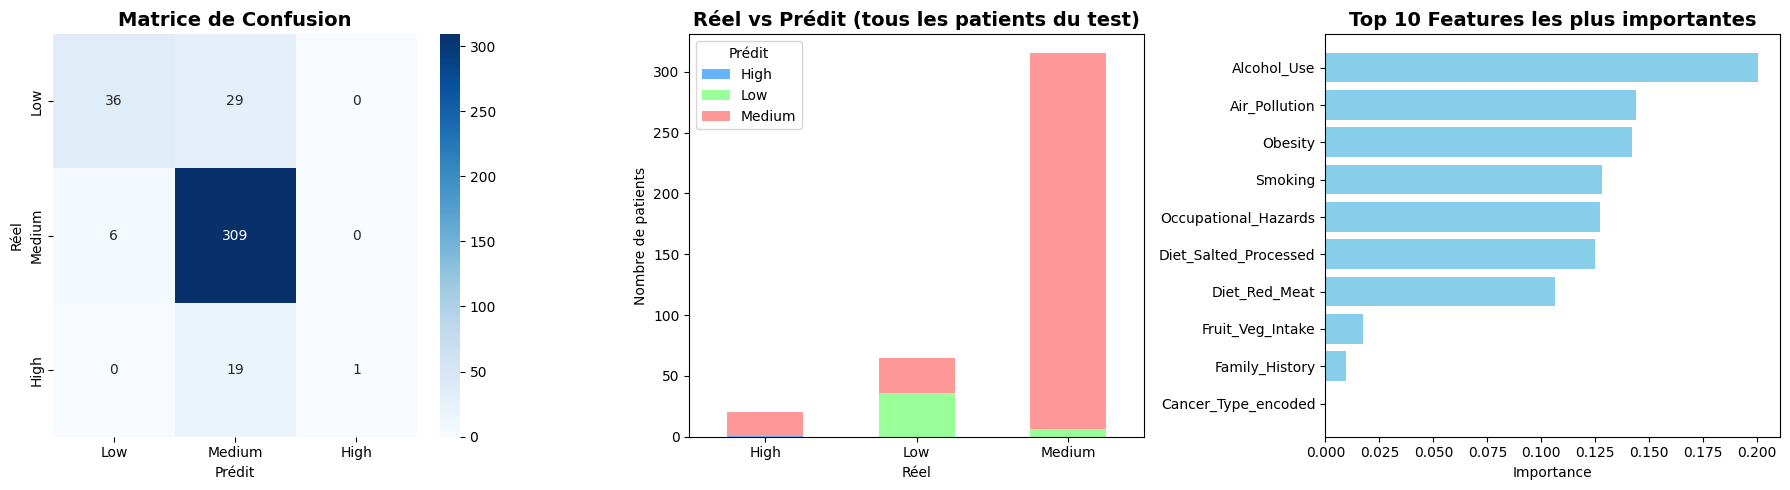

✅ Modèle AdaBoost entraîné et artefacts sauvegardés.


In [30]:
# ===============================
# 9. AdaBoost + Visualisations Complètes et Jolies
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# --- 1. Encodage ---
le_cancer = LabelEncoder()
le_risk   = LabelEncoder()

df['Cancer_Type_encoded'] = le_cancer.fit_transform(df['Cancer_Type'])
df['Risk_Level_encoded']  = le_risk.fit_transform(df['Risk_Level'])

# --- 2. Features ---
features_for_adaboost = [
    'Age', 'Gender', 'Smoking', 'Alcohol_Use', 'Obesity', 'Family_History',
    'Diet_Red_Meat', 'Diet_Salted_Processed', 'Fruit_Veg_Intake',
    'Physical_Activity', 'Air_Pollution', 'Occupational_Hazards',
    'BRCA_Mutation', 'H_Pylori_Infection', 'Calcium_Intake', 'BMI',
    'Physical_Activity_Level', 'Cancer_Type_encoded'
]

X = df[features_for_adaboost]
y = df['Risk_Level_encoded']

# --- 3. Normalisation + Split ---
scaler_adaboost = StandardScaler()
X_scaled = scaler_adaboost.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Modèle AdaBoost ---
base = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(
    estimator=base,
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# --- 5. Prédictions ---
y_pred = model.predict(X_test)

# Traduction en texte clair
y_test_text  = le_risk.inverse_transform(y_test)
y_pred_text  = le_risk.inverse_transform(y_pred)

# --- 6. Accuracy ---
print(f"Accuracy du modèle : {accuracy_score(y_test, y_pred):.3f}\n")

# ===============================
# VISUALISATIONS
# ===============================

plt.figure(figsize=(18, 5))

# 1. Matrice de confusion (la plus importante !)
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test_text, y_pred_text, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Matrice de Confusion', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')

# 2. Comparaison Réel vs Prédit
plt.subplot(1, 3, 2)
comparaison = pd.DataFrame({'Réel': y_test_text, 'Prédit': y_pred_text})
comparaison.value_counts().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66b3ff','#99ff99','#ff9999'])
plt.title('Réel vs Prédit (tous les patients du test)', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)

# 3. Importance des variables (les features qui comptent le plus)
plt.subplot(1, 3, 3)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10
top_features = [features_for_adaboost[i] for i in indices]
top_values   = importances[indices]

plt.barh(range(len(top_values)), top_values, color='skyblue')
plt.yticks(range(len(top_values)), top_features)
plt.gca().invert_yaxis()
plt.title('Top 10 Features les plus importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# --- 7. Sauvegarde complète ---
joblib.dump(model,                'adaboost_model.pkl')
joblib.dump(scaler_adaboost,      'scaler_adaboost.pkl')
joblib.dump(le_risk,              'label_encoder_risk.pkl')
joblib.dump(le_cancer,            'label_encoder_cancer.pkl')
joblib.dump(features_for_adaboost,'features_list.pkl')

print("✅ Modèle AdaBoost entraîné et artefacts sauvegardés.")